# L'algorithme de descente de gradient 

## 1. Le cas d'une fonctionnelle quadratique
 
Tout d'abord, nous appliquons la méthode à une fonctionnelle quadratique :
\begin{align}\label{quadf}\tag{1} f(x)=\dfrac12 x^TA x + b^T x +c,\qquad \text{pour } x\in \mathbb{R}^ N, \end{align}
avec
$A$ une matrice réelle $N\times N$, symétrique définie positive, $b\in\mathbb{R}^N$ et $c\in \mathbb{R}$. 

**Question 1.** Calculez le gradient et la matrice Hessienne de $f$.

**Question 2.** Que pouvez-vous en déduire sur la nature de $f$ ?

**Question 3.** Montrez que $f$ atteint son minimum sur $\mathbb{R}^N$ en un seul point $x^*$. Donnez une caractérisation de ce point. 

### 1.1 L'algorithme de descente de gradient à pas optimal

Soit $f$ une fonction convexe et coercive de classe $C^1$ sur $\mathbb{R}^N$. L'algorithme optimal de descente de gradient est défini comme suit. 

Soit $x^0\in \mathbb{R}^N$ (on essaie de choisir $x^0$ proche de $x^*$, en l'absence d'indication alors on prend $x^0=0$). 

Ensuite, pour $k=0,1,2,\ldots\ $ jusqu'à convergence, répéter : 

$$
\left|
\begin{array}{lcl}
d^k& \longleftarrow & -\nabla f(x^k),\\
\tau^k &\longleftarrow &\mathop{argmin}_{t>0} f(x^k + td^k),\\ 
x^{k+1}&\longleftarrow &x^k+\tau^k d^k
\end{array}
\right.
$$

**Question 4.** Proposez un critère d'arrêt pour l'algorithme qui utilise la caractérisation de la question **3**. 

*Remarque :** En général, on ne sait pas calculer $\tau^k$ et en pratique, la deuxième étape est remplacée par une recherche approchée. Cependant, lorsque $f$ est quadratique, le calcul de $\tau^k$ est facile. 

**Question 5.** Dans le cas de la fonction quadratique (1), explicitez $d^k$ et $\tau^k$ comme fonctions de $A$, $x^k$ et $b$. 

Maintenant, nous spécifions $N=2$ et
$$ A=\binom{C\quad 0}{0\quad 1},\quad C\ge 1,\quad b=0,\quad c=0.$$
**Question 6.** Quel est l'infimum de $f$ sur $\mathbb{R}^2$ dans ce cas ? Donner $x^*$. 

**Question 7.** Deux fonctions sont données ci-dessous :
- une fonction qui dessine un champ de facteur donné par une application $F$. À titre d'exemple, il est appliqué à l'application $G(x,y)=(x, 25y)$.
- une fonction qui dessine quelques lignes de niveau d'une fonction $f$. Il est appliqué à $g(x,y)=\dfrac{x^2+25x^2}2$. Notez que $G=\nabla g$. Qu'observez-vous ? 

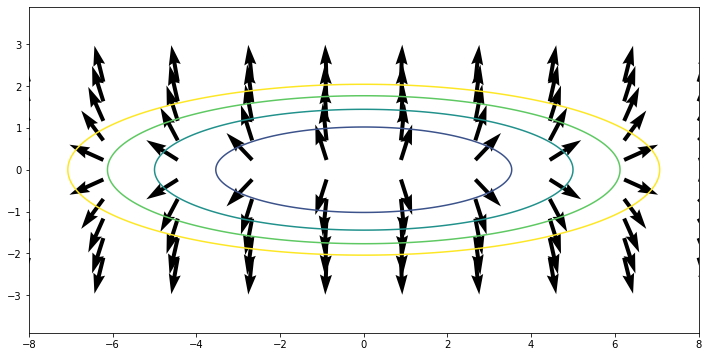

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

def draw_vector_field(F, xmin, xmax, ymin, ymax, N=15):
    X = np.linspace(xmin, xmax, N)  # x coordinates of the grid points
    Y = np.linspace(ymin, ymax, N)  # y coordinates of the grid points
    U, V = F(*np.meshgrid(X, Y))  # vector field
    M = np.hypot(U, V)  # compute the norm of (U,V)
    M[M == 0] = 1  # avoid division by 0
    U /= M  # normalize the u componant
    V /= M  # normalize the v componant
    return plt.quiver(X, Y, U, V, angles='xy')

def level_lines(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f') 


g = lambda x, y: .5*(x**2 + 12*y**2)
G = lambda x, y: np.array([x, 12*y])
%matplotlib inline
plt.figure(figsize=(12,6))
level_lines(g, -8, 8, -2.1, 2.1, np.linspace(0, 25, 5))
draw_vector_field(G,  -8, 8, -2.1, 2.1, 10)
plt.axis('equal')
plt.show()

**Question 8.** Implémentez l'algorithme de descente de gradient à pas optimal. Le point initial doit être $x^0=\binom1C$.

**Question 9.** Sur le même graphique, représentez les itérations, quelques lignes de niveau de $f$ et le champ de vecteur normalisé $\dfrac {1}{|\nabla f|}\nabla f$. 

In [20]:
import math

b=np.array([0,0])
c=0

def f(x):
    return 0.5*(x.T)@A@x+(b.T)@x+c


def descente_gradient(eps, C):
    x = np.array([1,C])
    z = [[1,C]]
    A=np.array([[C,0],[0,1]])
    n=0
    while math.sqrt(((A@x+b).T)@(A@x+b))>eps:
        d = -A@x-b
        tau = ((((b.T)@b)+((A@x).T)@(A@x)+2*((A@b).T)@x)) / ((((A@x).T)@A@A@x)+2*((A@b).T)@A@x+((A@b).T)@b)
        x = x+tau*d
        z.append(list(x))
        n=n+1    
    return x, n, z

def f(x):
    return 0.5*(x.T)@A@x+(b.T)@x+c

ite = []
C_values = [1, 2, 4, 8, 16, 32]
for C in C_values:
    print (C, descente_gradient(10**-8, C)[0:2])  
    ite.append(descente_gradient(10**-8, C)[1])
    

1 (array([0., 0.]), 1)
2 (array([2.58117479e-09, 5.16234958e-09]), 18)
4 (array([1.33674945e-09, 5.34699782e-09]), 40)
8 (array([-8.72989535e-10,  6.98391628e-09]), 83)
16 (array([-3.94570324e-10,  6.31312518e-09]), 173)
32 (array([2.15675299e-10, 6.90160956e-09]), 356)


**Question 10.** Changer la valeur de $C$ de 1 à 32 ($C=1,2,4,8,16,32$). Qu'observez-vous ?

**Question 11.** Tracez le nombre d'itérations de la méthode en fonction de $C$. Faites une hypothèse. 

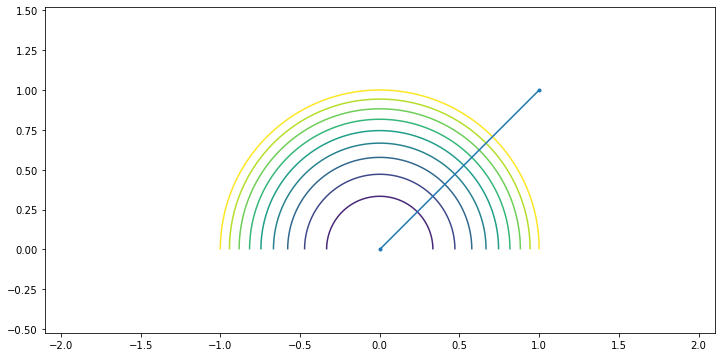

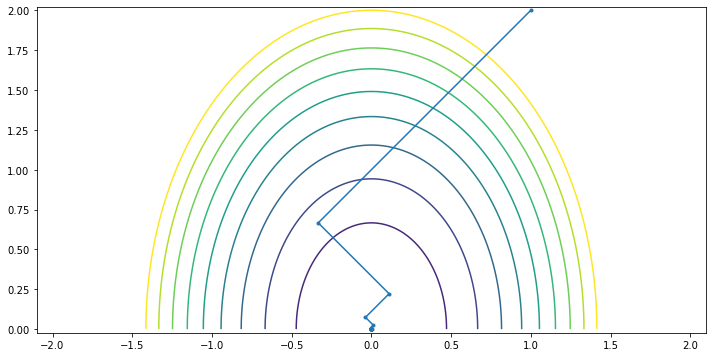

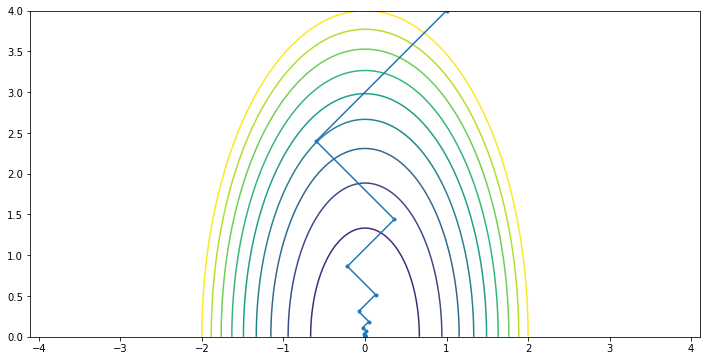

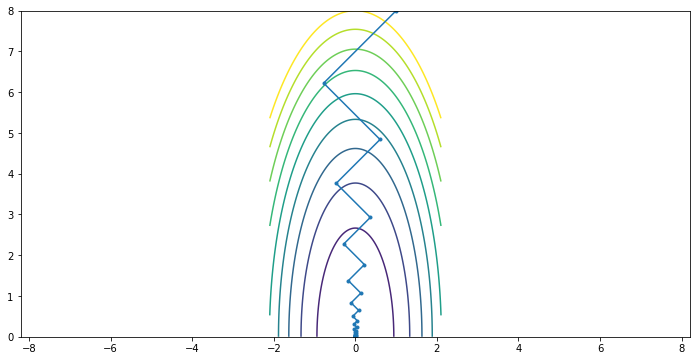

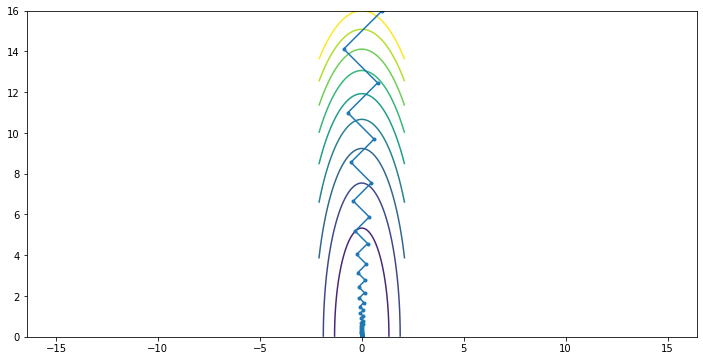

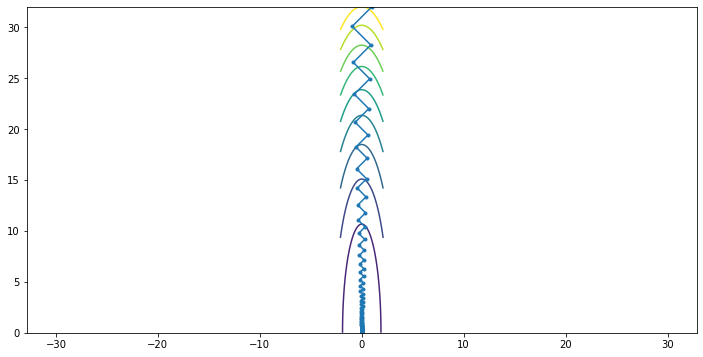

In [21]:
for C in C_values:    
    g = lambda x, y: .5*(C*x**2 + y**2) 
    G = lambda x, y: np.array([C*x, y])
    Z=descente_gradient(10**-8, C)[2]
    x=[]
    y=[]
    for i in range (len(Z)):
        x.append(Z[i][0])
        y.append(Z[i][1])
    %matplotlib inline
    plt.figure(figsize=(12,6))
    level_lines(g, -2.1, 2.1, 0, C, np.linspace(0, .5*C**2, 10))    #draw_vector_field(G,  -8, 8, -2.1, 2.1, 10)
    plt.plot(x,y,'.',linestyle='-')
    plt.axis('equal')
    plt.show()

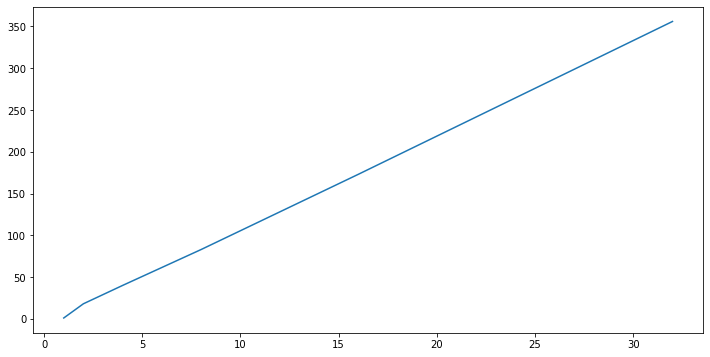

In [7]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(C_values, ite)
plt.show()

## 2. Le cas d'une fonction convexe régulière, line search. 

On considère la fonction définie par
$$
f(x,y):= \cosh(x) + \sin^2(x+y),\qquad \text{pour }z=(x,y)\in \mathbb{R}^2.
$$

**Question 12.** Montrer que $f$ est convexe au voisinage de $z^0_*$.

Nous allons appliquer un algorithme de descente de gradient avec ``line search'' à la fonction $f$. Plus précisément :

Étant donné  $z^0=(x^0,y^0)\in\mathbb{R}^2$, calculer de manière récursive, jusqu'à convergence,

$$
\left|
\begin{array}{lcl}
d^k& \longleftarrow & -\nabla f(z^k),\\
\tau^k &\longleftarrow & \text{Line-search}\ \left(\ t\mapsto f(z^k + td^k)\ \right),\\ 
z^{k+1}&\longleftarrow &z^k+\tau^k d^k
\end{array}
\right.
$$

Précisons la deuxième étape. On remarque d'abord que pour $t>0$,

$$
f(z^k+t d^k) \,=\, f(z^k) -t \|d^k\|^2 +o(t).
$$

En fait, si $f$ est convexe au voisinage de $z^k$, on a aussi pour $t>0$ assez petit, 

$$
f(z^k+t d^k)\, \ge\, f(z^k) -t \|d^k\|^2,
$$

donc on ne peut pas demander $f(z^k+t d^k) \,\le\, f(z^k) -t \|d^k\|^2$. 

L'idée de la *condition Armijo* est de demander un peu moins. Fixons un $\alpha\in (0,1)$ : la condition Armijo s'écrit : 

$$
\tag{2}f(z^k+t d^k)\, \le\, f(z^k) -\alpha\, t \|d^k\|^2.
$$

En utilisant le développement limité ci dessus, on a 

$$
\begin{array}{rcl}
f(z^k+t d^k) &=& f(z^k) -t \|d^k\|^2 +o(t)\\
   &=& f(z^k) -\alpha\, t \|d^k\|^2 - (1-\alpha)t\|d^k\|^2 +o(t)\\
   & = & f(z^k) -\alpha\, t \|d^k\|^2 -t \left[(1-\alpha)\|d^k\|^2 +o(1)\right]
\end{array}
$$

Pour $t>0$ assez petit, le terme entre crochet est positif et donc (2) est vrai.

Nous ne voulons pourtant pas choisir un $\tau^k$ trop petit (l'algorithme calerait). Pour éviter cela, nous fixons un pas maximal $\tau_0$ et un facteur $\beta\in(0,1)$ et nous testons successivement (2) avec $t=\tau_0$, $t=\tau_0\beta$, $t=\tau_0\beta^2$, ... 

On choisi $\tau^k=\tau_0\beta^j$ où $j$ est le premier entier tel que $t=\tau_0\beta^j$ vérifie (2).

Remarquez que comme $0<\beta<1$, cet entier existe. 

**Question 13.** Implémentez la méthode ci-dessus, avec $\alpha=0.5$, $\beta=0.75$. Commencez par $z^0=(1,0.5)$ et $\tau_0=1$. Ensuite, pour $k\ge 1$ utilisez $\tau_0\leftarrow\tau^0/\beta$.

Tout d'abord pour vous aider, la cellule suivante montre quelques ensembles de niveaux de $f$ et le champ de vecteur normalisé $\dfrac {1}{|\nabla f|}\nabla f$ au voisinage de $z^*$. 

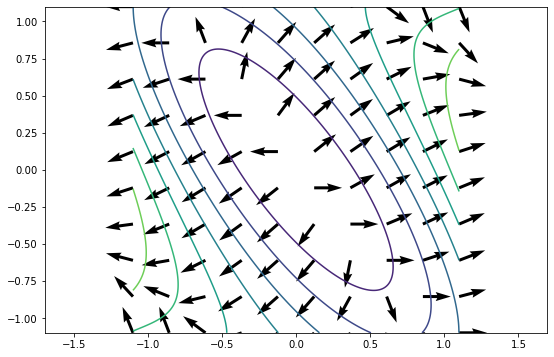

In [34]:
def draw_vector_field_2(F, xmin, xmax, ymin, ymax, N=15):
    X = np.linspace(xmin, xmax, N)  # x coordinates of the grid points
    Y = np.linspace(ymin, ymax, N)  # y coordinates of the grid points
    U, V = F(*np.meshgrid(X, Y))  # vector field
    M = np.hypot(U, V)  # compute the norm of (U,V)
    M[M == 0] = 1  # avoid division by 0
    U /= M  # normalize the u componant
    V /= M  # normalize the v componant
    return plt.quiver(X, Y, U, V, angles='xy')

def level_lines_2(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f') 

f = lambda x, y : np.cosh(x)+ np.sin(x + y)**2
df = lambda x, y : np.array([np.sinh(x) + 2*np.cos(x + y)*np.sin(x + y), 2*np.cos(x + y)*np.sin(x + y)])
%matplotlib inline
plt.figure(figsize=(9,6))
level_lines_2(f, -1.1, 1.1, -1.1, 1.1, np.linspace(1, 3, 10))
draw_vector_field_2(df, -1.1, 1.1, -1.1, 1.1, 10)
plt.axis('equal')
plt.show()

In [38]:
def f(x,y):
    return np.cosh(x)+ np.sin(x+y)**2

def df(x,y):
    return np.array([np.sinh(x) + 2*np.cos(x + y)*np.sin(x + y), 2*np.cos(x + y)*np.sin(x + y)])

def descente_gradient1(eps):
    alpha=0.5
    beta=0.75  
    z=(1,0.5)
    iterations=[list(z)]
    tau=1
    n=0
    while math.sqrt((df(z[0], z[1]).T)@df(z[0], z[1]))>eps:
        d = -df(z[0], z[1])
        t=tau
        j=0
        while f(z[0]+t*d[0], z[1]+t*d[1])>f(z[0], z[1])-alpha*t*d.T@d:
            j=j+1
            t=tau*beta**j
        z = z+t*d
        tau = t/beta
        iterations.append(list(z))
        n=n+1    
    return z, n, iterations

print (descente_gradient1(10**-6))

(array([-8.73743777e-07,  1.26475783e-06]), 60, [[1, 0.5], [-0.3163212017036685, 0.35887999194013276], [-0.1832292277584653, 0.3110591454613893], [-0.20494344336458084, 0.23104511410761447], [-0.1398896892009893, 0.20903183099029846], [-0.13883398552021115, 0.15087890182357322], [-0.09023697486679992, 0.14071698661965698], [-0.09353681072764553, 0.10882684432119441], [-0.06691735738866184, 0.09592788908525327], [-0.0618667848009163, 0.06330934953041295], [-0.04319212951943617, 0.0623964778039827], [-0.04116446888500209, 0.04619679266263368], [-0.023664183839544724, 0.040535523992306165], [-0.026053814771156276, 0.032529747176329796], [-0.021907228683920144, 0.028431810775442927], [-0.01816933721436696, 0.02292685087021574], [-0.013300644797777133, 0.01757472876796564], [-0.009735914951927167, 0.0111636808904822], [-0.0058656107720133745, 0.009557446392499227], [-0.006345902721970659, 0.007221227891939588], [-0.004407262277473939, 0.006482672657029574], [-0.004262999193179207, 0.0041478

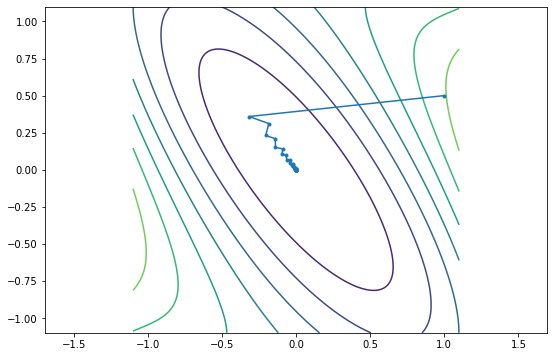

In [39]:
%matplotlib inline
Z=descente_gradient1(10**-8)[2]
x=[]
y=[]
for i in range (len(Z)):
    x.append(Z[i][0])
    y.append(Z[i][1])
plt.figure(figsize=(9,6))
level_lines_2(f, -1.1, 1.1, -1.1, 1.1, np.linspace(1, 3, 10))
#draw_vector_field_2(df, -1.1, 1.1, -1.1, 1.1, 10)
plt.plot(x,y,'.',linestyle='-')
plt.axis('equal')
plt.show()

On considère maintenant la fonction définie sur $\mathbb{R}^3$ par 
$$
f(x,y,z):= \cosh(x) + \sin^2(x+y) + (y-z)^2,\qquad \text{pour }w=(x,y,z)\in \mathbb{R}^2.
$$

**Question 14.** Appliquez la méthode d'optimisation ci-dessus à cette fonction, en commençant par $w^0=(1,0.5,1)$. 

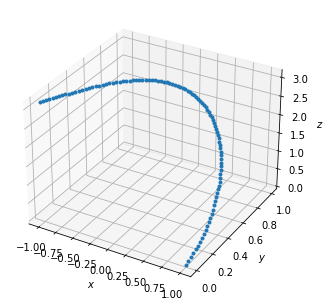

In [14]:
# Pour les plots en 3 dimensions
from mpl_toolkits.mplot3d import Axes3D

# exemple
t = np.linspace(0,np.pi,101)
x, y, z = np.cos(t), np.sin(t), t+.5*np.sin(t)**2

ax = Axes3D(plt.figure())  # Define the 3D plot
ax.set(xlabel=r'$x$', ylabel=r'$y$', zlabel=r'$z$')
ax.plot(x, y, z,'.')  # Plot of the trajectory
plt.show()

In [41]:
def f(w):
    return np.cosh(w[0])+ np.sin(w[0]+w[1])**2+(w[1]-w[2])**2

def df(w):
    return np.array([np.sinh(w[0]) + 2*np.cos(w[0] + w[1])*np.sin(w[0] + w[1]), 
                                2*np.cos(w[0] + w[1])*np.sin(w[0] + w[1]) + 2*(w[1] - w[2]),  2*(w[2] - w[1])])

def descente_gradient2(eps):
    alpha=0.5
    beta=0.75  
    z=(1,0.5,1)
    iterations=[list(z)]
    tau=1
    n=0
    while math.sqrt((df(z).T)@df(z))>eps:
        d = -df(z)
        t=tau
        j=0
        while f(z+t*d)>f(z)-alpha*t*d.T@d:
            j=j+1
            t=tau*beta**j
        z = z+t*d
        tau = t/beta
        iterations.append(list(z))
        n=n+1    
    return z, n, iterations

print (descente_gradient2(10**-6)[0:2])

(array([-1.26369289e-06,  1.82481837e-06,  2.01159019e-06]), 148)


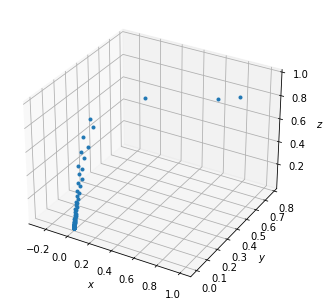

In [44]:
# Pour les plots en 3 dimensions
from mpl_toolkits.mplot3d import Axes3D

Z=descente_gradient2(10**-6)[2]
u=[]
v=[]
w=[]
for i in range (len(Z)):
    u.append(Z[i][0])
    v.append(Z[i][1])
    w.append(Z[i][2])

ax = Axes3D(plt.figure())  # Define the 3D plot
ax.set(xlabel=r'$x$', ylabel=r'$y$', zlabel=r'$z$')
ax.plot(u, v, w,'.')  # Plot of the trajectory
plt.show()